In [1]:
%pwd

'd:\\DeepLearning(project-2)\\Research'

In [2]:
import os 


In [3]:
os.chdir('../')

In [4]:
%pwd

'd:\\DeepLearning(project-2)'

In [ ]:
import os 
import sys 
import matplotlib.pyplot as plt 
import tensorflow as tf
import numpy as np
from  tensorflow.keras.preprocessing.image import load_img,img_to_array
from sklearn.metrics import confusion_matrix
sys.path.append(os.path.abspath(os.path.join(os.path.dirname(os.getcwd()),'../')))
from src.logger import logging
from src.exception import CustomException
from src.components.componentCommon import dataset_arrangement

In [6]:
import os
print(os.path.exists('artifacts/training/model.h5'))


True


In [7]:
import os
model = tf.keras.models.load_model('artifacts/training/model.h5')


[2025-02-20 16:04:57,315 - 256 Compiled the loaded model, but the compiled metrics have yet to be built. `model.compile_metrics` will be empty until you train or evaluate the model.]


# Evaluate the model 

In [8]:
train_dataset,valid_dataset,test_dataset = dataset_arrangement()

Found 253 files belonging to 2 classes.


In [9]:
model.evaluate(test_dataset)

26/26 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 1.0000 - loss: 0.4147 


[0.42149636149406433, 1.0]

In [10]:
prediction = []
labels = []
for image,label in test_dataset:
    pred = model(image)
    prediction.append(pred)
    lab = label
    labels.append(lab)

In [11]:
labels

[<tf.Tensor: shape=(1,), dtype=int32, numpy=array([1], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([0], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([0], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([0], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([0], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([1], dtype=int32)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([0], dtype=int32)>,
 <tf.Tensor: shape=(

In [12]:
prediction

[<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.04106753, 0.95893246]], dtype=float32)>,
 <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.02058319, 0.9794168 ]], dtype=float32)>,
 <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.00238541, 0.9976146 ]], dtype=float32)>,
 <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.9906805, 0.0093195]], dtype=float32)>,
 <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.03644095, 0.96355903]], dtype=float32)>,
 <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.22479062, 0.77520937]], dtype=float32)>,
 <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.01941724, 0.9805828 ]], dtype=float32)>,
 <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.9980331 , 0.00196688]], dtype=float32)>,
 <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.83406806, 0.16593195]], dtype=float32)>,
 <tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.05322633, 0.9467737 ]], dtype=float32)>,
 <tf.Tensor:

In [13]:
pred = np.array(tf.argmax(prediction,axis=-1)).flatten()

confusion_matrix(labels,pred)

array([[12,  0],
       [ 0, 14]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


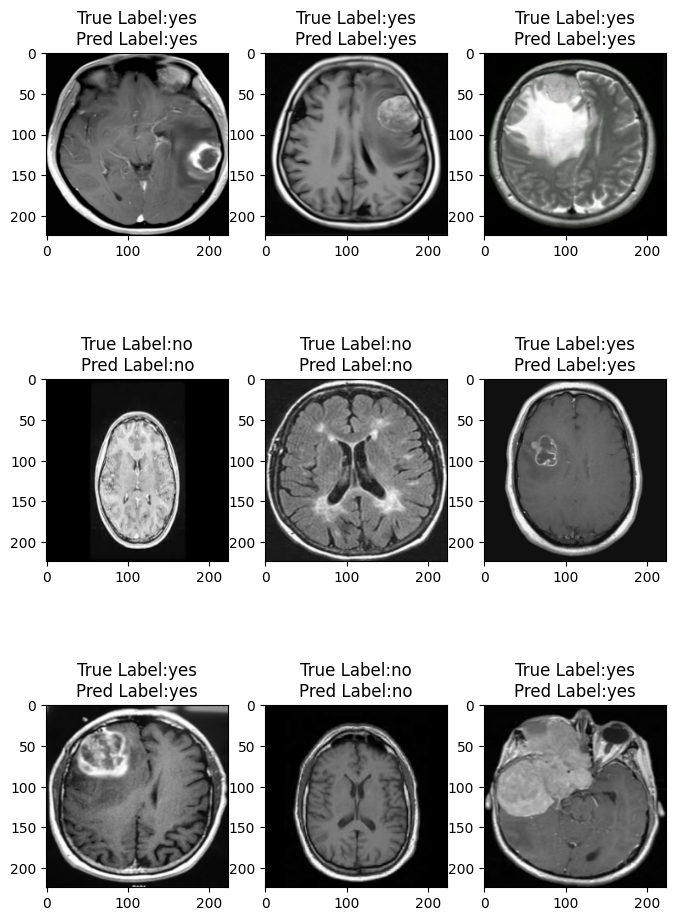

In [14]:
# image for pred 
class_names = ['no','yes']
plt.figure(figsize=(8,12))

for i,(image,label) in enumerate(test_dataset.take(9)):
    
    ax = plt.subplot(3,3,i+1)
    plt.imshow(image[0])
    plt.title('True Label:'+class_names[label[0]]+'\nPred Label:'+class_names[tf.argmax(model.predict(image),axis=-1)[0]])


In [15]:
# single prediction 
path = 'artifacts/data_ingestion/brain_tumor_dataset/yes/Y3.jpg'
image = load_img(path,target_size=(224,224))

img = img_to_array(image)
print(img.shape)
img = tf.expand_dims(img,axis=0)
pred= np.array(tf.argmax(model.predict(img),axis=-1))[0]
class_names[pred]

(224, 224, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


'yes'